<h1 style="text-align: center;"><span style="color:#011f4b; font-size:15px; "> WELCOME TO WEEK 9 </span></h1>

<span style="color:#011f4b; font-size:15px; "> This is laboratory work 6. </span>

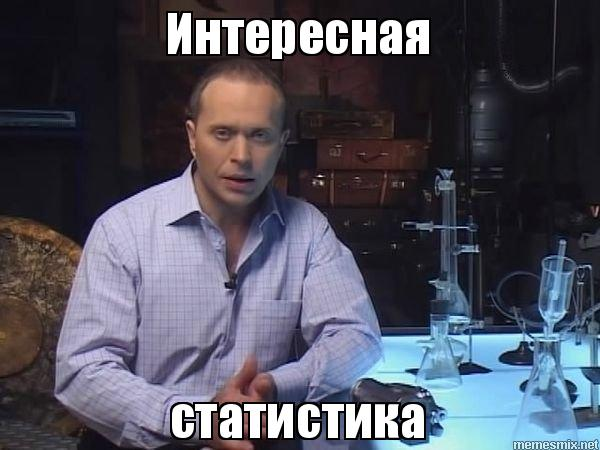<span style="color:#011f4b; font-size:15px; "><b>Pay attention to the file name - your file should be named as "Laboratory_work_6_Name_group" .</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied. No pic -> -3%.
</span>

<span style="color:#011f4b; font-size:15px; "> This week you will work with the dataset of Students</span>

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 1 </h3> <br/>Import all necessary <code>packages</code> and get first look at you <code>dataset</code> 
    <br/> <span style="color:#00a0e5">(Ваша задача - подключить все необходимые пакеты и получить представление о данных) </span>
    <br/>
    Use <code>head()</code>, <code>shape</code>, <code>info()</code> and <code>describe()</code> functions
        </span>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 2 </h3> <br/>Simple random sampling -  write a function (don't use a any module from scikit-learn or stats packages) that creates a random sample from you <code>dataset</code>
    <br/> <span style="color:#00a0e5">(Напишите функцию, которая создает случайные выборки из вашего набора данных) </span>
    </span>

In [4]:
df = pd.read_csv('data/student-portug.csv', index_col='IDs')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
IDs,,,,,,,,,,,,,,,,,,,,,
0,GP,F,6574.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3.0,4,0,11,11
1,GP,F,62049.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3.0,2,9,11,11
2,GP,F,NaN,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3.0,6,12,13,12
3,GP,F,5479.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5.0,0,14,14,14
4,GP,F,5844.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5.0,0,11,13,13


In [6]:
def random_sampling(data, n):
    ids = np.arange(data.shape[0])
    np.random.shuffle(ids)
    return data.iloc[ids[:n],:]

In [7]:
random_sampling(df, 10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
IDs,,,,,,,,,,,,,,,,,,,,,
568,MS,M,6940.0,U,GT3,T,3,2,at_home,services,...,3,2,1,1,1,3.0,4,6,11,9
393,GP,F,6574.0,U,LE3,T,3,3,services,services,...,5,3,3,1,1,1.0,4,14,14,15
349,GP,F,6209.0,U,GT3,T,3,2,health,health,...,5,2,2,1,2,5.0,0,18,18,18
77,GP,F,5844.0,U,GT3,T,2,2,other,other,...,5,2,3,1,3,3.0,1,13,13,13
252,GP,F,5844.0,U,GT3,A,4,1,other,other,...,5,3,3,1,2,5.0,0,14,13,13
237,GP,M,6574.0,U,GT3,T,2,2,other,other,...,3,3,3,5,5,4.0,9,10,9,10
49,GP,F,5479.0,U,GT3,T,4,4,services,teacher,...,4,4,4,1,1,3.0,2,13,12,12
297,GP,M,6209.0,R,GT3,T,2,2,other,services,...,5,2,2,1,1,4.0,0,9,10,10
47,GP,M,NaN,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2.0,2,17,17,17


<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 3 </h3> <br/>Stratified sampling -  write a function (don't use a any module from scikit-learn or stats packages) that creates a stratified sample from you <code>dataset</code>
    <br/> <span style="color:#00a0e5">(Стратифицированная выборка - напишите функцию, которая создает стратифицированные выборки из вашего набора данных ) </span>
    </span>

In [8]:
def stratified_sampling(data, p, n):
    props = data[p].value_counts(normalize=True)
    tot = pd.DataFrame(columns=[data.columns])
    for i, j in data.groupby(p):
        tot = np.vstack((tot, random_sampling(j, int(n*props[i]))))
    return random_sampling(pd.DataFrame(data=tot, columns=[data.columns]), tot.shape[0])

In [9]:
stratified_sampling(df, 'sex', 10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,5844,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,0,14,13,13
7,MS,M,5479,U,GT3,T,3,3,services,services,...,4,3,3,2,4,3,11,12,10,11
1,MS,F,6940,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0
8,GP,M,6209,R,GT3,T,2,2,other,other,...,4,5,2,1,1,1,0,12,13,13
3,GP,F,6209,U,GT3,T,1,1,other,services,...,4,3,4,1,2,5,4,11,10,11
5,GP,M,5479,U,GT3,T,2,3,other,services,...,3,2,2,1,3,3,0,11,11,12
6,GP,M,6209,R,LE3,T,1,1,other,services,...,5,3,5,1,5,5,0,8,8,8
2,GP,F,6574,U,GT3,T,2,2,at_home,other,...,4,2,5,1,1,2,2,10,9,10
4,GP,F,6209,U,GT3,T,3,1,services,services,...,3,4,3,2,3,5,0,17,18,17


<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 4.1 </h3> <br/>Estimation - Use any data column from dataset, compute mean and std - simulate this experiment(yu can use SimulateSamplee function) 1000 times and plot the sampling distribution of the estimate, calculate mean and std. 
    <br/> <span style="color:#00a0e5">() </span>
    </span>

In [10]:
# here mu-population mean, sigma-population std, n-sample size, m-samples amount
def SimulateSamplee(mu, sigma, n, m):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        means.append(np.mean(xs))
    return means

(array([  2.,  11.,  54., 123., 230., 254., 196., 103.,  21.,   6.]),
 array([11.23848372, 11.36475301, 11.4910223 , 11.61729159, 11.74356088,
        11.86983017, 11.99609947, 12.12236876, 12.24863805, 12.37490734,
        12.50117663]),
 <a list of 10 Patch objects>)

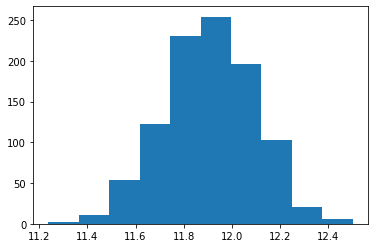

In [11]:
plt.hist(SimulateSamplee(df['G3'].mean(), df['G3'].std(), 300, 1000))

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 4.2 </h3> <br/>Estimation - Use previous data column from dataset, compute mean and std - randomly sample from data 1000 times and plot the sampling distribution of the estimate, calculate mean and std. Compare with Task 4.1
    <br/> <span style="color:#00a0e5"> </span>
    </span>

In [12]:
def samplee(data, n, m):
    means = []
    for j in range(m):
        means.append(random_sampling(data, n)['G3'].mean())
    return means

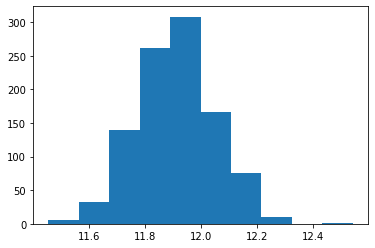

In [13]:
plt.hist(samplee(df, 300, 1000));

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! Now it's time to relax - next week we have no laboratory work, so you will have an opportunity to discuss your mid term tasks.
 